In [37]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, datasets
from matplotlib import pyplot as plt
import numpy as np

In [38]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = datasets.mnist.load_data()

In [39]:
print(x_train_raw.shape, y_train_raw.shape)
print(x_test_raw.shape, y_test_raw.shape)
print(x_train_raw[0])
print(y_train_raw[0])

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0 

In [40]:
#conversao de rotulos em variaveis
num_classes = 10
y_train = keras.utils.to_categorical(y_train_raw, num_classes)
y_test = keras.utils.to_categorical(y_test_raw, num_classes)
print(y_train_raw[0])
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


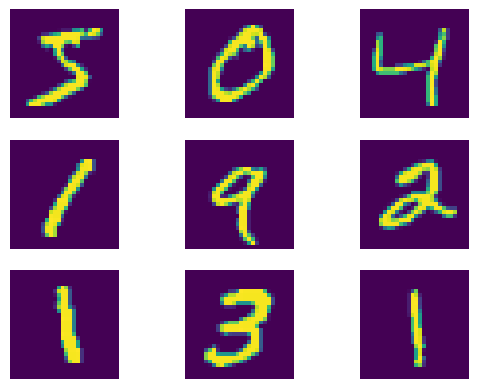

In [41]:
plt.figure()
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(x_train_raw[i])
  plt.axis('off')
plt.show()

In [42]:
# conversao de uma matriz(imagem) de 28x28 pra um vetor de 784 sem perder informação
x_train = x_train_raw.reshape(60000, 784)
x_test = x_test_raw.reshape(10000, 784)

In [43]:
#normalizar valores dos pixels
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [44]:
# criar um modelo de rede neural profunda(DNN) com tres camadas conectadas
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_dim= 784),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
Optimizer = optimizers.Adam(0.001)
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Optimizer, metrics=['accuracy'])

In [46]:
#ajuste de dados de treinamento ao modelo e chamando o metodo fit para treino
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8673 - loss: 0.4461 - val_accuracy: 0.9621 - val_loss: 0.1221
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9731 - loss: 0.0862 - val_accuracy: 0.9752 - val_loss: 0.0826
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9834 - loss: 0.0512 - val_accuracy: 0.9785 - val_loss: 0.0676
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9881 - loss: 0.0364 - val_accuracy: 0.9814 - val_loss: 0.0628
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9901 - loss: 0.0301 - val_accuracy: 0.9809 - val_loss: 0.0618
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9935 - loss: 0.0210 - val_accuracy: 0.9757 - val_loss: 0.0822
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9934 - loss: 0.0199 - val_accuracy: 0.9800 - val_loss: 0.0767
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9941 - loss: 0.0185 - val_accuracy: 0.

In [47]:
#avaliacao modelo DNN
score= model.evaluate(x_test, y_test, verbose=0)
print('Perda do teste: ', score[0])
print('Acurácia do teste: ', score[1])

Perda do teste:  0.07039141654968262
Acurácia do teste:  0.9825999736785889


In [48]:
model.save('./model/final_DNN_model.h5')

In [49]:
from tensorflow.keras.models import load_model
new_model = load_model('./model/final_DNN_model.h5')
new_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,436 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [50]:
new_score = new_model.evaluate(x_test, y_test, verbose=0)
print('Perda do teste: ', new_score[0])
print('Acurácia do teste: ', new_score[1])

Perda do teste:  0.07039141654968262
Acurácia do teste:  0.9825999736785889


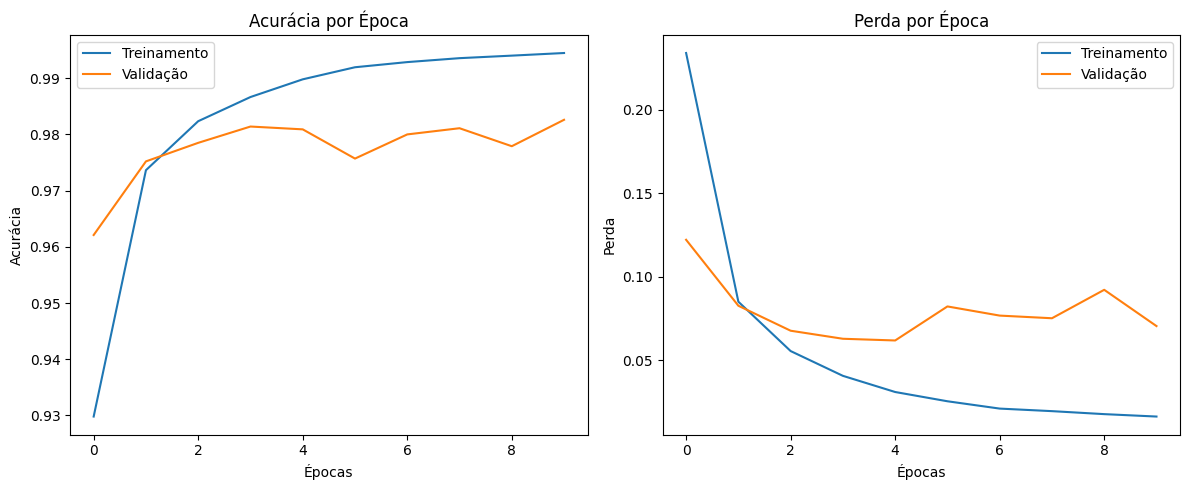

In [51]:
# Histórico de acurácia do modelo entre as epocas e o gráfico de perdas

#plotar acurácia
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia por Época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

#plotar a perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda por Época')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


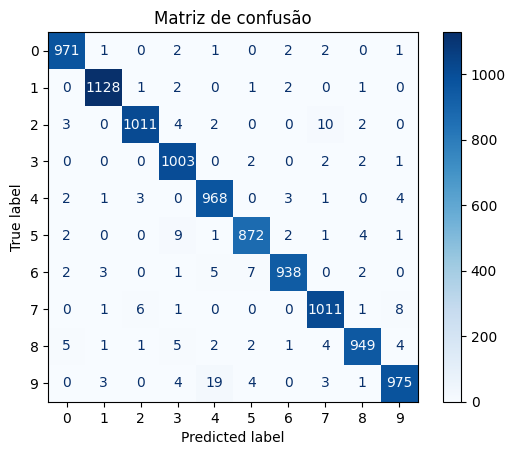

In [52]:
# gerar predict e avaliar com matriz de confusão

import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Obter previsoes do modelo
y_pred_prob = model.predict(x_test) # retorna probabilidades

#converter para rótulos preditos
y_pred = np.argmax(y_pred_prob, axis=1)

#converter rótulos reais (se estiverem one-hot encoded )
y_true = np.argmax(y_test, axis=1)

#gerar matriz de confusao
cm = confusion_matrix(y_true, y_pred)

#exibir a matriz de confusao com rotulos
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matriz de confusão')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Acurácia:, 0.9826
Precisão (macro): 0.9826
Recall (macro): 0.9824
F1-score (macro): 0.9824
Cohen Kappa: 0.9807

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



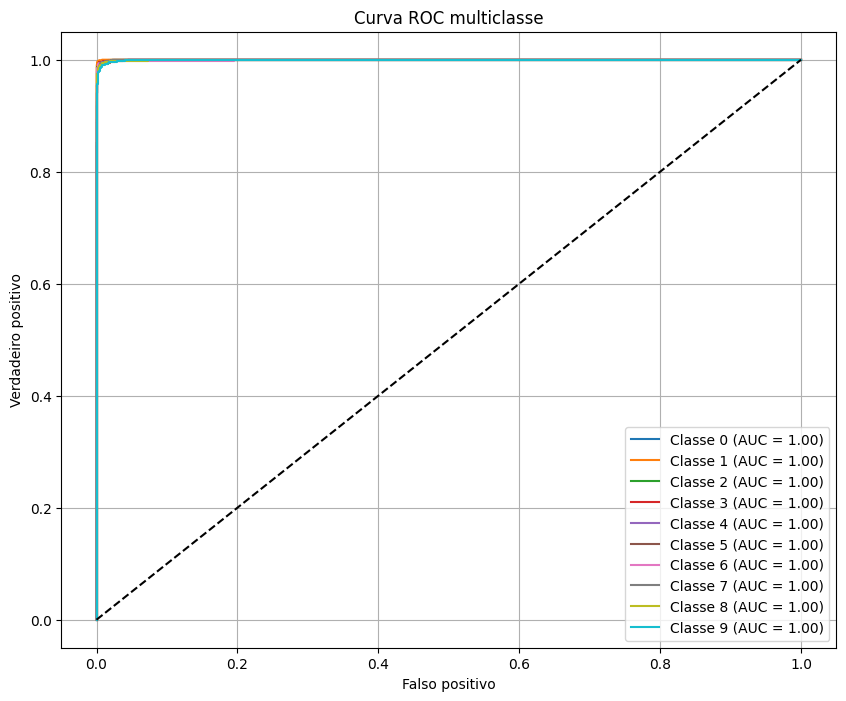

In [53]:
#gerar acuracia, precisao, cobertura, f1, cohen kappa, prf e roc

y_pred_prob = model.predict(x_test)   #probabilidades
y_pred = np.argmax(y_pred_prob, axis=1)   #rotulos previstos
y_true = np.argmax(y_test, axis=1)

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, classification_report, roc_curve, auc, roc_auc_score)
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

#Acurácia
acc = accuracy_score(y_true, y_pred)
print(f"Acurácia:, {acc:.4f}")

#Precisão, recall e f1 (macro = média das classes)
prec = precision_score(y_true, y_pred, average='macro')
rec = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
print(f"Precisão (macro): {prec:.4f}")
print(f"Recall (macro): {rec:.4f}")
print(f"F1-score (macro): {f1:.4f}")

#cohen kappa
kappa = cohen_kappa_score(y_true, y_pred)
print(f"Cohen Kappa: {kappa:.4f}")

#relatorio completo (prf por classe)
print("\nRelatório de Classificação:\n")
print(classification_report(y_true, y_pred))

#binarizar os rotulos para ROC multiclasse
n_classes = y_pred_prob.shape[1]
y_true_bin = label_binarize(y_true, classes=range(n_classes))

#calcular ROC e AUC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

#plotar curvas ROC
plt.figure(figsize=(10, 8))
for i in range(n_classes):
  plt.plot(fpr[i], tpr[i], label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--') #linha de referencia
plt.xlabel('Falso positivo')
plt.ylabel('Verdadeiro positivo')
plt.title('Curva ROC multiclasse')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [54]:
model = keras.Sequential()

#camada de entrada
model.add(keras.layers.Conv2D(filters=32,
                              kernel_size=5,
                              strides=(1, 1),
                              padding='same',
                              activation = tf.nn.relu,
                              input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2),
                                 strides=(2, 2),
                                 padding='valid'))

#segunda camada convolucional
model.add(keras.layers.Conv2D(filters=64,
                              kernel_size=3,
                              strides=(1, 1),
                              padding='same',
                              activation=tf.nn.relu))

model.add(keras.layers.MaxPool2D(pool_size=(2, 2),
                                 strides=(2, 2),
                                 padding='valid'))

#adicionar camada de dropout para tentar evitar overlifting
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())

#camada totalmente conectada
model.add(keras.layers.Dense(units=128,
                             activation=tf.nn.relu))
model.add(keras.layers.Dropout(0.5))

#camada de saída
model.add(keras.layers.Dense(units=10, activation=tf.nn.softmax))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,154 (1.61 MB)

 Trainable params: 422,154 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
%%time
#expansao das dimensoes para os patamares originais
X_train = x_train.reshape(60000,28,28,1)
X_test = x_test.reshape(10000,28,28,1)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=X_train,y=y_train,epochs=5, validation_data=(X_test, y_test), batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8060 - loss: 0.6097 - val_accuracy: 0.9824 - val_loss: 0.0563
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9699 - loss: 0.0962 - val_accuracy: 0.9880 - val_loss: 0.0354
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9796 - loss: 0.0706 - val_accuracy: 0.9893 - val_loss: 0.0314
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9831 - loss: 0.0550 - val_accuracy: 0.9908 - val_loss: 0.0252
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9848 - loss: 0.0504 - val_accuracy: 0.9915 - val_loss: 0.0282
CPU times: user 16.1 s, sys: 1.12 s, total: 17.2 s
Wall time: 19.8 s


In [56]:
test_loss, test_acc=model.evaluate(x=X_test, y=y_test)
print('Acurácia do teste da CNN: %.2f'%test_acc)
print('Perda do teste da CNN: %.2f'%test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9896 - loss: 0.0322
Acurácia do teste da CNN: 0.99
Perda do teste da CNN: 0.03


In [57]:
model.save('./model/final_CNN_model.h5')
#model.save('./model/final_CNN_model.keras')
#keras.saving.save_model(model,'final_CNN_model.keras')

In [58]:
from tensorflow.keras.models import load_model
from tensorflow.keras.activations import softmax

#define custom_objects to map the problematic identifier to the correct function
custom_objects = {'softmax_v2': softmax}

new_model = load_model('./model/final_CNN_model.h5', custom_objects=custom_objects)
new_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,156 (1.61 MB)

 Trainable params: 422,154 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [59]:
#from tensorflow.keras.models import load_model
#new_model = load_model('./model/final_CNN_model.h5')
#new_model.summary()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
Resultados da PREVISÃO das 20 primeiras imagens do conjunto de teste
7,2,1,0,4,	
1,4,9,5,9,	
0,6,9,0,1,	
5,9,7,3,4,	
9,6,6,5,4,	
0,7,4,0,1,	
primeiras 20 primeiras imagens do conjunto de teste


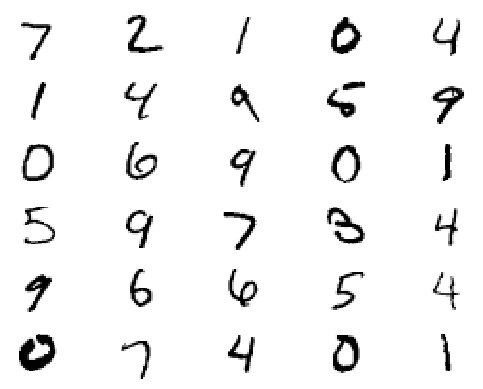

In [60]:
#visualize os resultados da saida do conjunto de testes
%matplotlib inline
def res_visual(n):
  #faça predição no conjunto de testes usando new_model
  final_opt_a = np.argmax(model.predict(X_test[0:n]), axis=-1)

  #print(final_opt_a)
  fig, ax = plt.subplots(nrows=int(n/5), ncols=5)
  ax = ax.flatten()
  print('Resultados da PREVISÃO das 20 primeiras imagens do conjunto de teste')
  for i in range(n):
    print(final_opt_a[i], end=',')
    if int((i+1)%5) == 0:
      print('\t')

    #vendo as imagens do banco
    img = X_test[i].reshape((28,28))
    plt.axis("off")
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].axis("off")
  print('primeiras 20 primeiras imagens do conjunto de teste')

res_visual(30)